# Pittsburgh's Best Neighborhood
### Advaitha Agastheeswaran
### Data Set- [Grow Pittsburgh Food Gardens] (https://data.wprdc.org/dataset/grow-pittsburgh-food-gardens) G


### Group Name: Green Beans
### Metric - Pittsburgh Gardens

# To begin, I imported the following:

In [55]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

### In order to access the data, I had to load the entire data set for the gardens in Pittsburgh as a csv file. I added a row_count variable to refer to rather than hard coding 80 rows

In [121]:
#loading the entire dataset for the gardens as a csv file
data = pd.read_csv("Skills-Lab-6/gardens.csv", low_memory=False)
row_count = len(data) #adding a row_count variable to refer to rather than hard coding '80 rows'
data.head(row_count)

,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253
4,Grow Pittsburgh,589,grow-pittsburgh-site,https://www.growpittsburgh.org/directory/garde...,6587 Hamilton Avenue #2W,Pittsburgh,Pennsylvania,15206.0,US,40.458481,-79.911381
...,...,...,...,...,...,...,...,...,...,...,...
75,Penn Hills Community Garden,734,allegheny-grows-site|sustainability-fund-site,https://www.growpittsburgh.org/directory/garde...,1162 Jefferson Road,Penn Hills,Pennsylvania,15235.0,US,40.447638,-79.798817
76,Stanton Heights Allegheny Cemetery Community G...,735,sustainability-fund-site,https://www.growpittsburgh.org/directory/garde...,Stanton Avenue,Pittsburgh,Pennsylvania,15201.0,US,40.473711,-79.961237
77,The Harry Orlando Memorial Community Garden,736,community-garden,https://www.growpittsburgh.org/directory/garde...,2205 5th Avenue,Pittsburgh,Pennsylvania,15219.0,US,40.438247,-79.973943
78,The Octopus Garden,738,community-garden,https://www.growpittsburgh.org/directory/garde...,133 S. Aiken Avenue,Pittsburgh,Pennsylvania,15206.0,US,40.463591,-79.936771


### Now that we have the dataset, we need to analyze it based on what we actually need to measure. I narrowed it down by using the variable 'filtered_data' which looks for the id, zip code, urban grower, street address, and category rather than the entire dataset as a whole. 

### By analyzing our data, we can see that Squirrel Hill has the most gardens. We want to measure how 'green' Squirrel Hill really is by using the average area of a garden and assuming each garden is the same area in order to approximate how 'green' Squirrel Hill is.

In [129]:

# narrowed down to the specific columns that we do want
filtered_data = data[['urban_grower', 'street_address', 'zip_code', 'category']]
gardens_by_zip = filtered_data.groupby('zip_code').size().reset_index(name='garden_count')
sh_zip_codes = ['15217', '15206']
sh_gardens = filtered_data[filtered_data['zip_code'].isin(sh_zip_codes)]
sh_garden_count = len(sh_gardens)
# to compare Squirrel Hill to all the other neighborhoods
max_garden_zip = gardens_by_zip[gardens_by_zip['garden_count'] == gardens_by_zip['garden_count'].max()]
# assume each garden has the average area in square feet
average_garden_area = 2000  
squirrel_hill_total_area = sh_garden_count * average_garden_area
print(f"Squirrel Hill has {sh_garden_count} gardens.")
print(f"Approximately {average_garden_area} square feet, Squirrel Hill has around {squirrel_hill_total_area} square feet of gardens")
print(max_garden_zip)

Squirrel Hill has 0 gardens.
Approximately 2000 square feet, Squirrel Hill has around 0 square feet of gardens
    zip_code  garden_count
13   15206.0            13


### We want to use the narrowed down version of the dataset with all the relevant columns to group the data based on 'zip_code' and count the number of gardens in each ZIP code. The table is in descending order of 'garden_count' so that the ZIP codes with the most gardens appear first. This would show us which areas have the most square footage of gardens:


In [73]:

# Group by ZIP code and count the number of gardens
filtered_data2 = filtered_data.groupby('zip_code').size().reset_index(name='grower_count')

# Sort ZIP codes by grower count in descending order
filtered_data2 = filtered_data2.sort_values(by='grower_count', ascending=False)

print(filtered_data2)

    zip_code  grower_count
13   15206.0            13
22   15219.0             7
24   15221.0             5
18   15213.0             5
8    15201.0             5
15   15208.0             4
26   15224.0             3
16   15210.0             3
14   15207.0             3
23   15220.0             2
17   15212.0             2
29   15238.0             2
20   15217.0             2
25   15223.0             1
21   15218.0             1
27   15235.0             1
28   15237.0             1
30   15260.0             1
31   15342.0             1
32   16335.0             1
33   16441.0             1
0    15025.0             1
19   15214.0             1
1    15102.0             1
12   15205.0             1
11   15204.0             1
10   15203.0             1
9    15202.0             1
7    15135.0             1
6    15132.0             1
5    15131.0             1
4    15120.0             1
3    15108.0             1
2    15106.0             1
34   16511.0             1


### To represent the data we found, I made a bar graph and labelled according to the grower count and zip-codes

Text(0, 0.5, 'Number of Gardens')

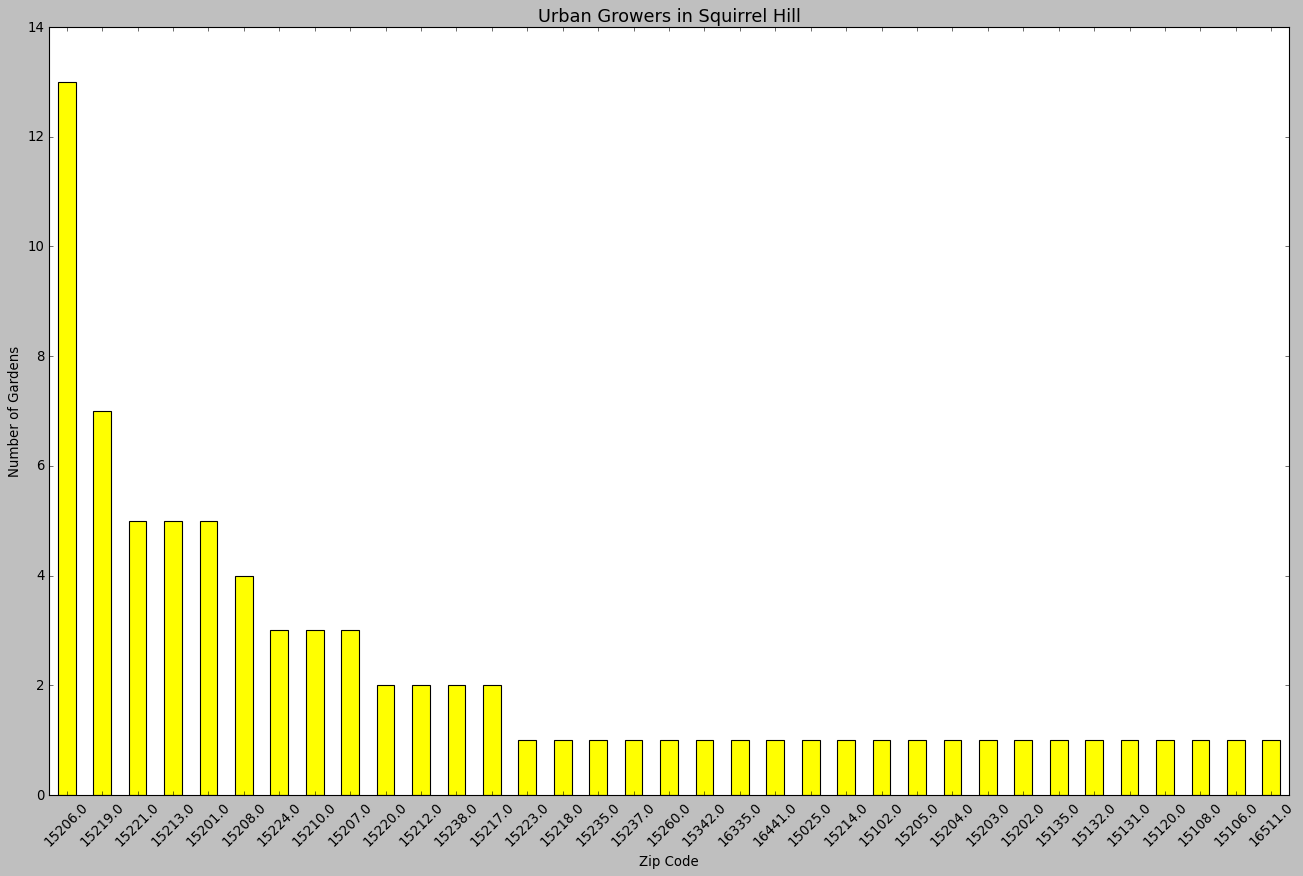

In [109]:
plot = filtered_data2.plot.bar(
    x='zip_code',  #x axis
    y='grower_count', #y axis
    rot=45,  # rotate x-axis labels by 45 degrees so we can actually read each zip code
    color='yellow',  
    figsize=(20, 12),  #set the size 
    legend=False 
)

plot.set_title('Urban Growers in Squirrel Hill', fontsize=16)
plot.set_xlabel('Zip Code', fontsize=12)
plot.set_ylabel('Number of Gardens', fontsize=12)

# Based on the data we can see that Squirrel Hill has the most gardens that have the greatest square footage of greenery, therefore Squirrel Hill is the Greenest Neighborhood in Pittsburgh